# <font style = "color:rgb(50,120,229)">Feature Based Image Alignment in OpenCV</font>

| <img src="https://www.learnopencv.com/wp-content/uploads/2015/07/image-alignment-example-opencv.jpg" alt="Input Image" width="600" height="600"/> |
| --- |
| <center>Figure 1. Left: An image from the Prokudin-Gorskii Collection. Right : The same image with the channels aligned.</center> |

The image on the left is part of a historic collection of photographs called the **Prokudin-Gorskii** collection. The image was taken by a Russian photographer in the early 1900s using one of the early color cameras. The color channels of the image are misaligned because of the mechanical nature of the camera. The image on the right is a version of the same image with the channels brought into alignment using a function available in OpenCV 3.

In this post we will embark on a fun and entertaining journey into the history of color photography while learning about image alignment in the process. This post is dedicated to the early pioneers of color photography who have enabled us to capture and store our memories in color.

# <font style = "color:rgb(50,120,229)">Feature Based Image Alignment in OpenCV</font>

| <img src="https://www.learnopencv.com/wp-content/uploads/2015/07/image-alignment-example-opencv.jpg" alt="Input Image" width="600" height="600"/> |
| --- |
| <center>Figure 1. Left: An image from the Prokudin-Gorskii Collection. Right : The same image with the channels aligned.</center> |

The image on the left is part of a historic collection of photographs called the **Prokudin-Gorskii** collection. The image was taken by a Russian photographer in the early 1900s using one of the early color cameras. The color channels of the image are misaligned because of the mechanical nature of the camera. The image on the right is a version of the same image with the channels brought into alignment using a function available in OpenCV 3.

In this post we will embark on a fun and entertaining journey into the history of color photography while learning about image alignment in the process. This post is dedicated to the early pioneers of color photography who have enabled us to capture and store our memories in color.

# <font style = "color:rgb(50,120,229)">A Brief and Incomplete History of Color Photography</font>

| <img src="https://www.learnopencv.com/wp-content/uploads/2015/06/first_color_photo.jpg" alt="Input Image" width="600" height="600"/> |
| --- |
| <center>Figure 2. Ribbon by Maxwell and Sutton was the first color photo ever taken by superimposing 3 grayscale images.</center> |

The idea that you can take three different photos using three primary color filters (Red, Green, Blue) and combine them to obtain a color image was first proposed by James Clerk Maxwell ( yes, the Maxwell ) in 1855. Six years later, in 1861, English photographer Thomas Sutton produced the first color photograph by putting Maxwell’s theory into practice. He took three grayscale images of a Ribbon ( see Figure 2 ), using three different color filters and then superimposed the images using three projectors equipped with the same color filters. The photographic material available at that time was sensitive to blue light, but not very sensitive to green light, and almost insensitive to red light. Although revolutionary for its time, the method was not practical.

By the early 1900s, the sensitivity of photographic material had improved substantially, and in the first decade of the century a few different practical cameras were available for color photography. Perhaps the most popular among these cameras, the *Autochrome*, was invented by the Lumière brothers.

A competing camera system was designed by Adolf Miethe and built by Wilhelm Bermpohl, and was called *Professor Dr. Miethe’s Dreifarben-Camera*. In German the word "Dreifarben" means tri-color. This camera, also referred to as the Miethe-Bermpohl camera, had a long glass plate  on which the three images were acquired with three different filters. A very good description and an image of the camera can be found [here](http://www.vintagephoto.tv/mb.shtml).

In the hands of Sergey Prokudin-Gorskii the Miethe-Bermpohl camera ( or a variant of it ) would secure a special place in Russian history . In 1909, with funding from Tsar Nicholas II, Prokudin-Gorskii started a decade long  journey of capturing Russia in color! He took more than 10,000 color photographs. The most notable among his photographs is the only known color photo of Leo Tolstoy.

Fortunately for us, the Library of Congress purchased a large collection of [Prokudin-Gorskii’s photographs](http://www.loc.gov/pictures/collection/prok/) in 1948. They are now in the public domain and we get a chance to reconstruct Russian history in color!

| <img src="https://www.learnopencv.com/wp-content/uploads/2015/06/emir.jpg" alt="Input Image" width="600" height="600"/> |
| --- |
| <center>Figure 3 : Three images captured on a vertical glass plate by a  Miethe-Bermpohl camera.</center> |

It is not trivial to generate a color image from these black and white images (shown in Figure 3). The Miethe-Bermpohl camera was a mechanical device that took these three images over a span of 2-6 seconds. Therefore the three channels were often mis-aligned, and naively stacking them up leads to a pretty unsatisfactory result shown in Figure 1.

Well, it’s time for some vision magic!

# <font style = "color:rgb(50,120,229)">Reconstructing Prokudin-Gorskii Collection in Color</font>

| <img src="https://www.learnopencv.com/wp-content/uploads/2015/07/image-alignment-example2-opencv.jpg" alt="Input Image" width="600" height="600"/> |
| --- |

The above image is also part of the Prokudin-Gorskii collection. On the left is the image with unaligned RGB channels, and on the right is the image after alignment. This photo also shows that by the early 20th century the photographic plates were sensitive enough to beautifully capture a wide color spectrum. The vivid red, blue and green colors are stunning.

Computer Vision in real world is tough, things often do not really work out of the box.

The problem is that the red, green, and blue channels in an image are not as strongly correlated if in pixel intensities as you might guess. For example, check out the blue gown the Emir is wearing in Figure 3. It looks quite different in the three channels. However, even though the intensities are different, something in the three channels is similar because a human eye can easily tell that it is the same scene.

Let's see if Computer Vision can match the powers of human eye in this case.

# <font style = "color:rgb(50,120,229)">Assignment Instructions</font>

In this assignment, you will implement **Feature Matching based Image Alignment**. This assignment carries **30 marks** and you will be allowed a maximum of **5 submissions**.

The assignment will be **manually graded** by Staff members.

## <font style = "color:rgb(50,120,229)">Grading Rubric</font>

1. **Step 1**: Read Image - **No Marks**
2. **Step 2**: Detect Features - **6 Marks**
3. **Step 3**: Match Features - **6 Marks**
4. **Step 4**: Calculate Homography - **12 Marks**
5. **Step 5**: Warping Image - **6 Marks**
6. **Step 6**: Merge Channels - **No Marks**


### <font style = "color:rgb(200,0,0)">*You can refer to code given in the previous sections for completing this assignment*</font>

## <font style = "color:rgb(50,120,229)">Step 1: Read Image</font>

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
import matplotlib
matplotlib.rcParams['figure.figsize'] = (10.0, 10.0)
matplotlib.rcParams['image.cmap'] = 'gray'

In [3]:
# Read 8-bit color image.
# This is an image in which the three channels are
# concatenated vertically.
im =  cv2.imread("emir.jpg", cv2.IMREAD_GRAYSCALE)

In [4]:
# Find the width and height of the color image
sz = im.shape
print(sz)

height = int(sz[0] / 3);
width = sz[1]

(1300, 500)


In [5]:
# Extract the three channels from the gray scale image
# and merge the three channels into one color image
im_color = np.zeros((height,width,3), dtype=np.uint8 )
for i in range(0,3) :
    im_color[:,:,i] = im[ i * height:(i+1) * height,:]

In [6]:
blue = im_color[:,:,0]
green = im_color[:,:,1]
red = im_color[:,:,2]

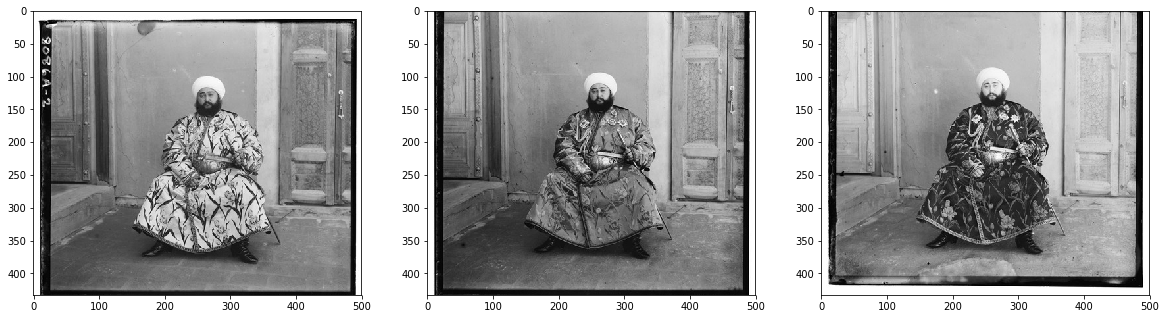

In [7]:
plt.figure(figsize=(20,12))
plt.subplot(1,3,1)
plt.imshow(blue)
plt.subplot(1,3,2)
plt.imshow(green)
plt.subplot(1,3,3)
plt.imshow(red)
plt.show()

## <font style = "color:rgb(50,120,229)">Step 2: Detect Features - 6 Marks</font>

We will align Blue and Red frame to the Green frame. Take a minute and think about a valid reason.

If you align blue and red channels, it might not give very good results since they are visually very different. You may have to do a lot parameter tuning ( MAX_FEATURES, GOOD_MATCH_PERCENT, etc) to get them aligned. On the other hand, Blue and Green channels are reasonably similar. Thus, taking green as the base channel will produce best results.

We detect ORB features in the 3 frames. Although we need only 4 features to compute the homography, typically hundreds of features are detected in the two images. We control the number of features using the parameter `MAX_FEATURES` in the Python code.

#### <font style = "color:rgb(200,0,0)">Set MAX_FEATURES and GOOD_MATCH_PERCENT ( You may need to play around with these parameters to get the desired result)</font>


In [38]:
MAX_FEATURES = 5000
GOOD_MATCH_PERCENT = 0.1


<font style = "color:rgb(200,0,0)">
Detect ORB features and compute descriptors.
    
You need to find the keypoints and descriptors for each channel using ORB and store them in respective variables

e.g. keyPointsBlue and descriptorsBlue are the keypoints and descriptors for the blue channel
</font>

In [39]:
# Detect ORB features and compute descriptors.
orb = cv2.ORB_create(MAX_FEATURES)
keypointsBlue, descriptorsBlue = orb.detectAndCompute(blue, None)
keypointsGreen, descriptorsGreen = orb.detectAndCompute(green, None)
keypointsRed, descriptorsRed = orb.detectAndCompute(red, None)


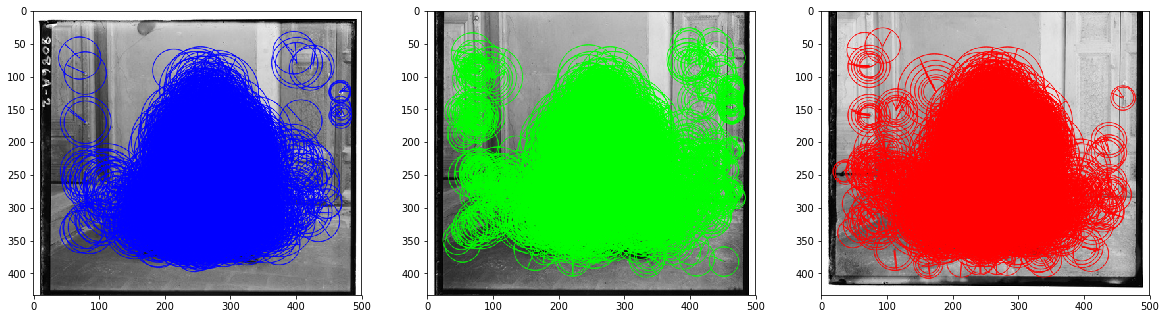

In [40]:
plt.figure(figsize=[20,10])
img2 = cv2.drawKeypoints(blue, keypointsBlue, None, color=(255,0,0), flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)
plt.subplot(131);plt.imshow(img2[...,::-1])

img2 = cv2.drawKeypoints(green, keypointsGreen, None, color=(0,255,0), flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)
plt.subplot(132);plt.imshow(img2[...,::-1])

img2 = cv2.drawKeypoints(red, keypointsRed, None, color=(0,0,255), flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)
plt.subplot(133);plt.imshow(img2[...,::-1])

## <font style = "color:rgb(50,120,229)">Step 3: Match Features - 6 Marks</font>

You need to find the matching features in the Green channel and blue/red channel, sort them by goodness of match and keep only a small percentage of original matches. We finally display the good matches on the images and write the file to disk for visual inspection. Use the hamming distance as a measure of similarity between two feature descriptors. 

Let's first match features between blue and Green channels.

#### <font style = "color:rgb(200,0,0)">Find the matches between Blue and Green channels and save them in matchesBlueGreen variable</font>

In [41]:
# Match features.
matcher = cv2.DescriptorMatcher_create(cv2.DESCRIPTOR_MATCHER_BRUTEFORCE_HAMMING)

# Match features between blue and Green channels
matchesBlueGreen = matcher.match(descriptorsBlue, descriptorsGreen, None)

# Sort matches by score
matchesBlueGreen.sort(key=lambda x: x.distance, reverse=False)

# Remove not so good matches
numGoodMatches = int(len(matchesBlueGreen) * GOOD_MATCH_PERCENT)
matchesBlueGreen = matchesBlueGreen[:numGoodMatches]

# Draw top matches
imMatchesBlueGreen = cv2.drawMatches(blue, keypointsBlue, green, keypointsGreen, matchesBlueGreen, None)

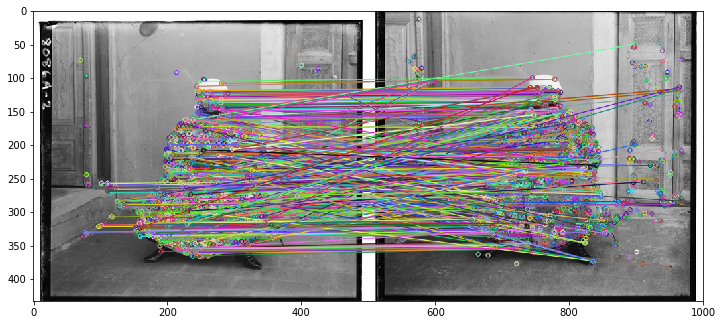

In [42]:
plt.figure(figsize=(12,12))
plt.imshow(imMatchesBlueGreen[:,:,::-1])
plt.show()

We will repeat the same process for Red and Green channels this time.

#### <font style = "color:rgb(200,0,0)">Find the matches between Red and Green channels and save them in matchesRedGreen variable</font>

In [43]:
# Match features.

# Match features between Red and Green channels
matchesRedGreen = matcher.match(descriptorsRed, descriptorsGreen, None)

# Sort matches by score
matchesRedGreen.sort(key=lambda x: x.distance, reverse=False)

# Remove not so good matches
numGoodMatches = int(len(matchesRedGreen) * GOOD_MATCH_PERCENT)
matchesRedGreen = matchesRedGreen[:numGoodMatches]

# Draw top matches
imMatchesRedGreen = cv2.drawMatches(red, keypointsRed, green, keypointsGreen, matchesRedGreen, None)

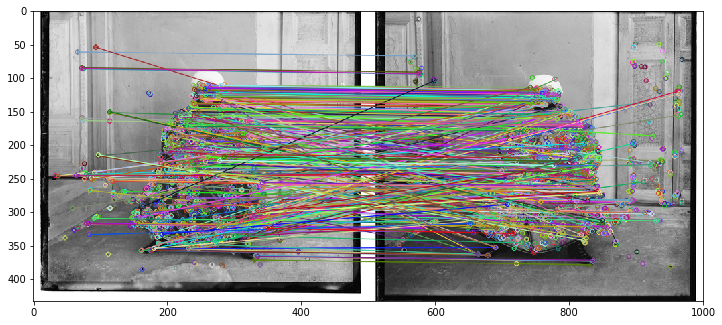

In [44]:
plt.figure(figsize=(12,12))
plt.imshow(imMatchesRedGreen[:,:,::-1])
plt.show()

## <font style = "color:rgb(50,120,229)">Step 4: Calculate Homography - 12 Marks</font>

Next, you need to compute the homography between the green and red/blue channels using the matches and keypoints computed in the previous step.

Let's first calculate the homography between Blue and Green channels.

#### <font style = "color:rgb(200,0,0)">Find the homography matrix between the Blue and Green channel and name it hBlueGreen</font>

In [45]:
# Extract location of good matches
points1 = np.zeros((len(matchesBlueGreen), 2), dtype=np.float32)
points2 = np.zeros((len(matchesBlueGreen), 2), dtype=np.float32)

for i, match in enumerate(matchesBlueGreen):
    points1[i, :] = keypointsBlue[match.queryIdx].pt
    points2[i, :] = keypointsGreen[match.trainIdx].pt

# Find homography
hBlueGreen, mask = cv2.findHomography(points1, points2, cv2.RANSAC)


Similarly, we can calculate the homography between Green and Red channels.

#### <font style = "color:rgb(200,0,0)">Find the homography matrix between the Red and Green channel and name it hRedGreen</font>

In [46]:
# Extract location of good matches
points1 = np.zeros((len(matchesRedGreen), 2), dtype=np.float32)
points2 = np.zeros((len(matchesRedGreen), 2), dtype=np.float32)

for i, match in enumerate(matchesRedGreen):
    points1[i, :] = keypointsRed[match.queryIdx].pt
    points2[i, :] = keypointsGreen[match.trainIdx].pt

# Find homography
hRedGreen, mask = cv2.findHomography(points1, points2, cv2.RANSAC)


## <font style = "color:rgb(50,120,229)">Step 5: Warping Image - 6 Marks</font>

Once an accurate homography has been calculated, the transformation can be applied to all pixels in one image to map it to the other image. This is done using the `warpPerspective` function in OpenCV. 

We map the Blue and Red channels to Green channel pixels. 

#### <font style = "color:rgb(200,0,0)">Find the warped images blueWarped and redWarped using the warpPerspective function</font>

In [47]:
# Use homography to find blueWarped and RedWarped images
height, width = blue.shape
blueWarped = cv2.warpPerspective(blue, hBlueGreen, (width, height))

redWarped = cv2.warpPerspective(red, hRedGreen, (width, height))

Text(0.5,1,'Red channel aligned w.r.t green channel')

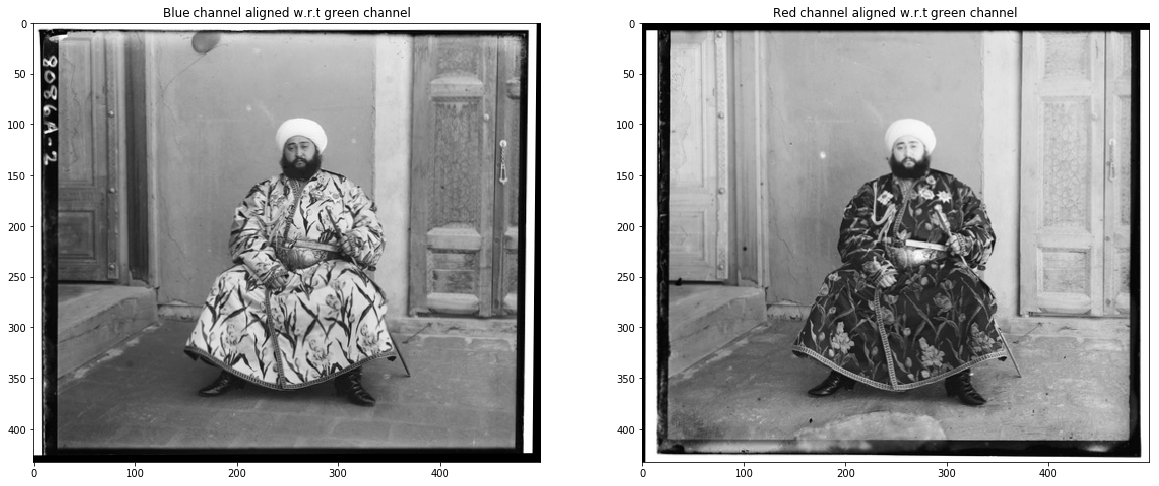

In [48]:
plt.figure(figsize=(20,10))
plt.subplot(121);plt.imshow(blueWarped);plt.title("Blue channel aligned w.r.t green channel")
plt.subplot(122);plt.imshow(redWarped);plt.title("Red channel aligned w.r.t green channel")

## <font style = "color:rgb(50,120,229)">Step 6: Merge Channels</font>

Finally, let's merge the channels to form the final colored image.

In [49]:
colorImage = cv2.merge((blueWarped,green,redWarped))

In [50]:
originalImage = cv2.merge((blue,green,red))

Text(0.5,1,'Aligned Image')

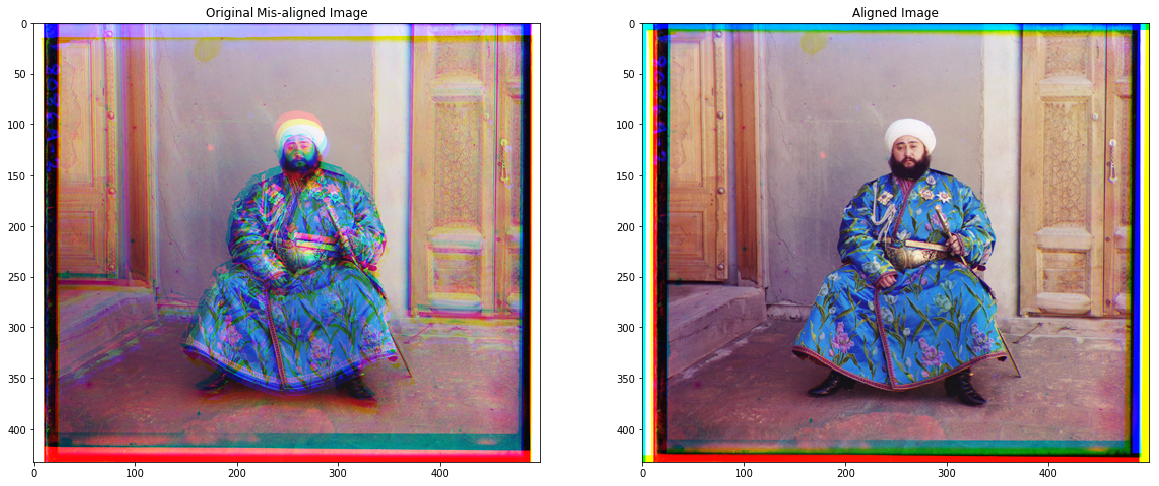

In [51]:
plt.figure(figsize=(20,10))
plt.subplot(121);plt.imshow(originalImage[:,:,::-1]);plt.title("Original Mis-aligned Image")
plt.subplot(122);plt.imshow(colorImage[:,:,::-1]);plt.title("Aligned Image")